# DynaSent version 1: Round 2 analysis

In [1]:
__author__ = 'Christopher Potts'

## Contents

1. [Set-up](#Set-up)
1. [Load the splits](#Load-the-splits)
1. [Label distributions](#Label-distributions)
1. [Relationship between validation labels and model predictions](#Relationship-between-validation-labels-and-model-predictions)
1. [Adversarial rates](#Adversarial-rates)
1. [Distribution of validation response distributions](#Distribution-of-validation-response-distributions)
1. [Worker distribution](#Worker-distribution)
1. [Estimates of human performance](#Estimates-of-human-performance)
1. [Examples for the paper](#Examples-for-the-paper)
1. [Random cases](#Random-cases)

## Set-up

In [2]:
import matplotlib.pyplot as plt
import os

import dynasent_utils as utils

In [3]:
plt.style.use("dynasent.mplstyle")

In [4]:
src_dirname = "dynasent-v1.1"

In [5]:
filename_template = os.path.join(
    src_dirname, "dynasent-v1.1-round02-dynabench-{}.jsonl")

In [6]:
train_filename = filename_template.format("train")

In [7]:
dev_filename = filename_template.format("dev")

In [8]:
test_filename = filename_template.format("test")

## Load the splits

In [9]:
train = utils.load_dataset(train_filename)

In [10]:
train[0]

{'hit_ids': ['y22661'],
 'sentence': "We enjoyed our first and last meal in Toronto at Bombay Palace, and I can't think of a better way to book our journey.",
 'sentence_author': 'w250',
 'has_prompt': True,
 'prompt_data': {'indices_into_review_text': [2093, 2213],
  'review_rating': 5,
  'prompt_sentence': "Our first and last meals in Toronto were enjoyed at Bombay Palace and I can't think of a better way to bookend our trip.",
  'review_id': 'Krm4kSIb06BDHternF4_pA'},
 'model_1_label': 'positive',
 'model_1_probs': {'negative': 0.29140257835388184,
  'positive': 0.6788994669914246,
  'neutral': 0.029697999358177185},
 'text_id': 'd16069',
 'label_distribution': {'positive': ['w43', 'w26', 'w155', 'w23'],
  'negative': [],
  'neutral': [],
  'mixed': ['w174']},
 'gold_label': 'positive'}

In [11]:
train_ternary = utils.load_dataset(
    train_filename,
    labels=('positive', 'negative', 'neutral'))

In [12]:
dev = utils.load_dataset(dev_filename)

In [13]:
test = utils.load_dataset(test_filename)

## Label distributions

In [14]:
utils.get_label_distribution(train, dev, test, dist_labels=False)

positive        6518
negative        5059
mixed           3334
neutral         2928
No Majority     2136
Total          19975
Name: gold_label, dtype: int64

In [15]:
utils.get_label_distribution(train, dist_labels=True)

positive    32551
negative    24994
mixed       18765
neutral     16365
Total       92675
dtype: int64

In [16]:
utils.get_label_distribution(train, dist_labels=False)

positive        6038
negative        4579
mixed           3334
neutral         2448
No Majority     2136
Total          18535
Name: gold_label, dtype: int64

In [17]:
utils.get_label_distribution(dev, dist_labels=False)

neutral     240
positive    240
negative    240
Total       720
Name: gold_label, dtype: int64

In [18]:
utils.get_label_distribution(test, dist_labels=False)

neutral     240
positive    240
negative    240
Total       720
Name: gold_label, dtype: int64

## Relationship between validation labels and model predictions

In [19]:
utils.get_label_model_relationship(train, model_colname='model_1_label')

gold_label  model_1_label
mixed       negative         1612
            neutral           584
            positive         1138
negative    negative         3693
            neutral           214
            positive          672
neutral     negative          406
            neutral          1473
            positive          569
positive    negative          255
            neutral           261
            positive         5522
dtype: int64

In [20]:
utils.get_label_model_relationship(dev, model_colname='model_1_label')

gold_label  model_1_label
negative    negative         80
            neutral          80
            positive         80
neutral     negative         80
            neutral          80
            positive         80
positive    negative         80
            neutral          80
            positive         80
dtype: int64

In [21]:
utils.get_label_model_relationship(test, model_colname='model_1_label')

gold_label  model_1_label
negative    negative         80
            neutral          80
            positive         80
neutral     negative         80
            neutral          80
            positive         80
positive    negative         80
            neutral          80
            positive         80
dtype: int64

## Adversarial rates

In [22]:
adversarial, total = utils.get_adversarial_rate(
    train, dev, test,
    model_colname='model_1_label',
    labels=('positive', 'negative', 'neutral'))

print(f"{adversarial:,} of {total:,} examples ({adversarial/total:0.2%}) are adversarial")

3,337 of 17,839 examples (18.71%) are adversarial


## Distribution of validation response distributions

In [23]:
utils.get_dist_of_majority_dists(train)

5    6439
3    5322
4    4638
dtype: int64

In [24]:
utils.get_dist_of_majority_dists(dev)

4    393
5    327
dtype: int64

In [25]:
utils.get_dist_of_majority_dists(test)

4    411
5    309
dtype: int64

## Worker distribution

In [26]:
worker_dist = utils.get_global_worker_dist(train, dev, test)

worker_dist.shape

(625,)

In [27]:
worker_dist.head()

w23     2080
w79     1953
w193    1946
w135    1837
w439    1821
dtype: int64

In [28]:
worker_dist.median()

20.0

In [29]:
worker_dist.mode()

0    1
dtype: int64

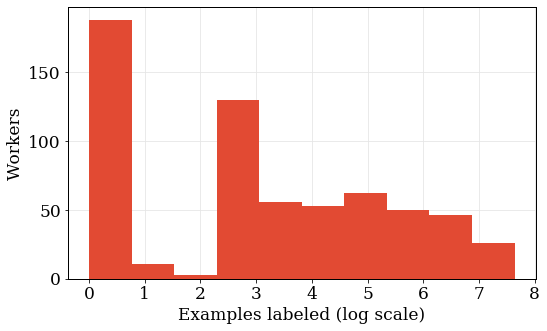

In [30]:
utils.plot_global_worker_dist(
    worker_dist, os.path.join('img', 'round2-workers.png'))

## Estimates of human performance

In [31]:
utils.get_fleiss_kappa(dev).round(3)

0.681

In [32]:
utils.get_fleiss_kappa(test).round(3)

0.667

In [33]:
utils.estimate_human_precision_recall_f1(dev).round(3)

,precision,recall,F1,support
positive,0.925,0.896,0.910,240.0
negative,0.926,0.899,0.912,240.0
neutral,0.900,0.878,0.889,240.0
Macro avg,0.917,0.891,0.904,240.0


In [34]:
utils.estimate_human_precision_recall_f1(test).round(3)

,precision,recall,F1,support
positive,0.923,0.894,0.909,240.0
negative,0.929,0.892,0.910,240.0
neutral,0.894,0.872,0.882,240.0
Macro avg,0.915,0.886,0.900,240.0


In [35]:
agr_df = utils.get_worker_agreement(dev)

In [36]:
agr_df[agr_df.rate == 1].shape[0]

116

In [37]:
agr_df.shape[0]

244

In [38]:
## Percentage of workers with 95% agreement or more:

agr_df[agr_df.rate >= 0.95].shape[0] / agr_df.shape[0]

0.5163934426229508

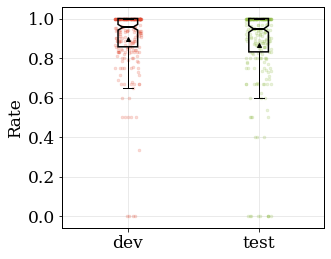

In [39]:
utils.plot_worker_agreement(
    dev, test, os.path.join('img', 'human-agr-round2.png'))

## Examples for the paper

In [40]:
utils.sample_short_examples(train, 'model_1_label')

,sentence,model_1_label,responses
0,The place was somewhat good and not well,negative,"mix, mix, mix, mix, neg"
3,I bought a new car and met with an accident.,negative,"neg, neg, neg, neg, neg"
6,The retail store is closed for now at least.,negative,"neu, neu, neu, neu, neu"
9,Prices are basically like garage sale prices.,negative,"neg, neu, pos, pos, pos"
1,That book was good. I need to get rid of it.,neutral,"mix, mix, mix, neg, pos"
4,I REALLY wanted to like this place,neutral,"mix, neg, neg, neg, pos"
7,But I'm going to leave my money for the next vet.,neutral,"neg, neu, neu, neu, neu"
10,once upon a time the model made a super decision.,neutral,"pos, pos, pos, pos, pos"
2,I cook my caribbean food and it was okay,positive,"mix, mix, mix, pos, pos"
5,This concept is really cool in name only.,positive,"mix, neg, neg, neg, neu"


## Random cases

In [41]:
utils.sample_examples(train, 'model_1_label')

,sentence,model_1_label,responses
0,The menu was appealing.,positive,"pos, pos, pos, pos, pos"
1,Our food took forever to get home.,negative,"neg, neg, neg, neg, neu"
2,Our table was ready after 90 minutes and usually I'd be mad but the scenery was nice so it was an okay time.,positive,"mix, mix, mix, mix, pos"
3,I left feeling like an initiator in a world of books that I never even knew existed.,positive,"mix, neu, pos, pos, pos"
4,"I decided to go with josh wilcox, only as a last resort",neutral,"mix, neg, neu, neu, neu"
5,: ] Standard ask if the food is a great happening!,neutral,"neu, neu, neu, neu, pos"
6,The car was really beautiful.,positive,"neu, pos, pos, pos, pos"
7,"Food is a beast of its own, low-quality ingredients, typically undercooked, and a thin, very simple menu.",negative,"neg, neg, neg, neg, neu"
8,I want to share a horrible experience here.,negative,"neg, neg, neg, neg, neg"
9,I tried a new place. The entrees were subpar to say the least.,negative,"neg, neg, neg, neg, neg"
